In [2]:
# Magic to automatically update imports if functions in utils are changed
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path
import featurewiz as fw

/Users/oskarjor/miniconda3/envs/tdt4173/lib/python3.9/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


Imported 0.2.02 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



In [3]:
features = fw.FeatureWiz(corr_limit=0.70, feature_engg='', category_encoders='', 
dask_xgboost_flag=False, nrows=None, verbose=2)

wiz = FeatureWiz(verbose=1)
        X_train_selected = wiz.fit_transform(X_train, y_train)
        X_test_selected = wiz.transform(X_test)
        wiz.features  ### provides a list of selected features ###            
        


In [4]:
stores_train = pd.read_csv("temp_data/full_features_train.csv", index_col=0)
stores_val = pd.read_csv("temp_data/full_features_val.csv", index_col=0)
stores_extra = pd.read_csv("temp_data/full_features_extra.csv", index_col=0)
stores_test = pd.read_csv("temp_data/full_features_test.csv", index_col=0)

store_dataframes = {
    "train": stores_train, 
    "extra": stores_extra, 
    "test": stores_test, 
    "val": stores_val
    }

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Correlation Limit = 0.7
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Regression problem ####
    Loaded train data. Shape = (10043, 299)
    Some column names had special characters which were removed...
#### Single_Label Regression problem ####
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
#### Single_Label Regression problem ####
    loading a sequential sample of 10000 rows into pandas for EDA
#############################################################

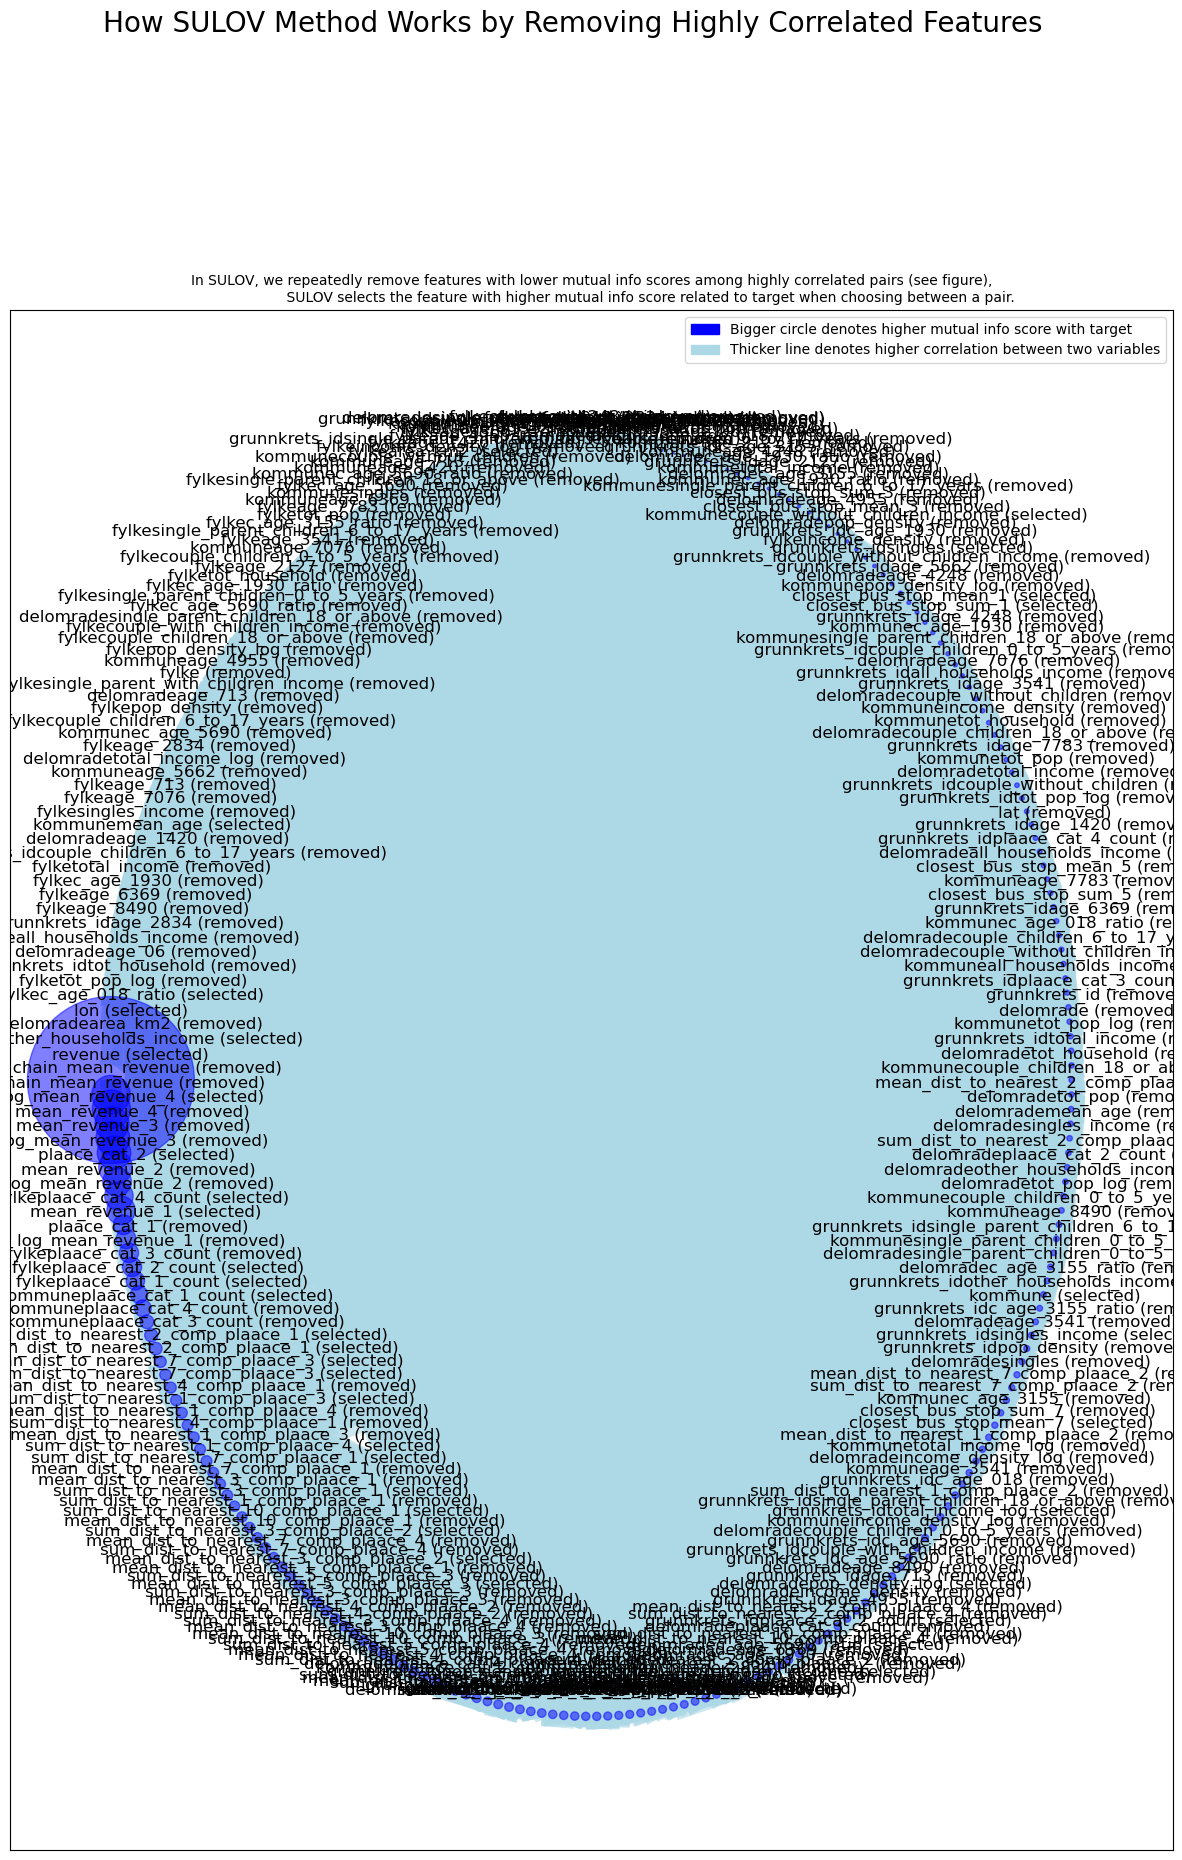

Time taken for SULOV method = 11 seconds
    Adding 8 categorical variables to reduced numeric variables  of 62
Finally 70 vars selected after SULOV
Converting all features to numeric before sending to XGBoost...
    there were no mixed data types or object columns that errored. Data is all numeric...
Shape of train data after adding missing values flags = (10043, 95)
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors before recursive XGBoost = 94 
    Taking top 43 features per iteration...
    XGBoost version using 1.6.2 as tree method: hist
Number of booster rounds = 100
        using 94 variables...
            selecting 1 features in this iteration
            Time taken for regular XGBoost feature selection = 1 secon

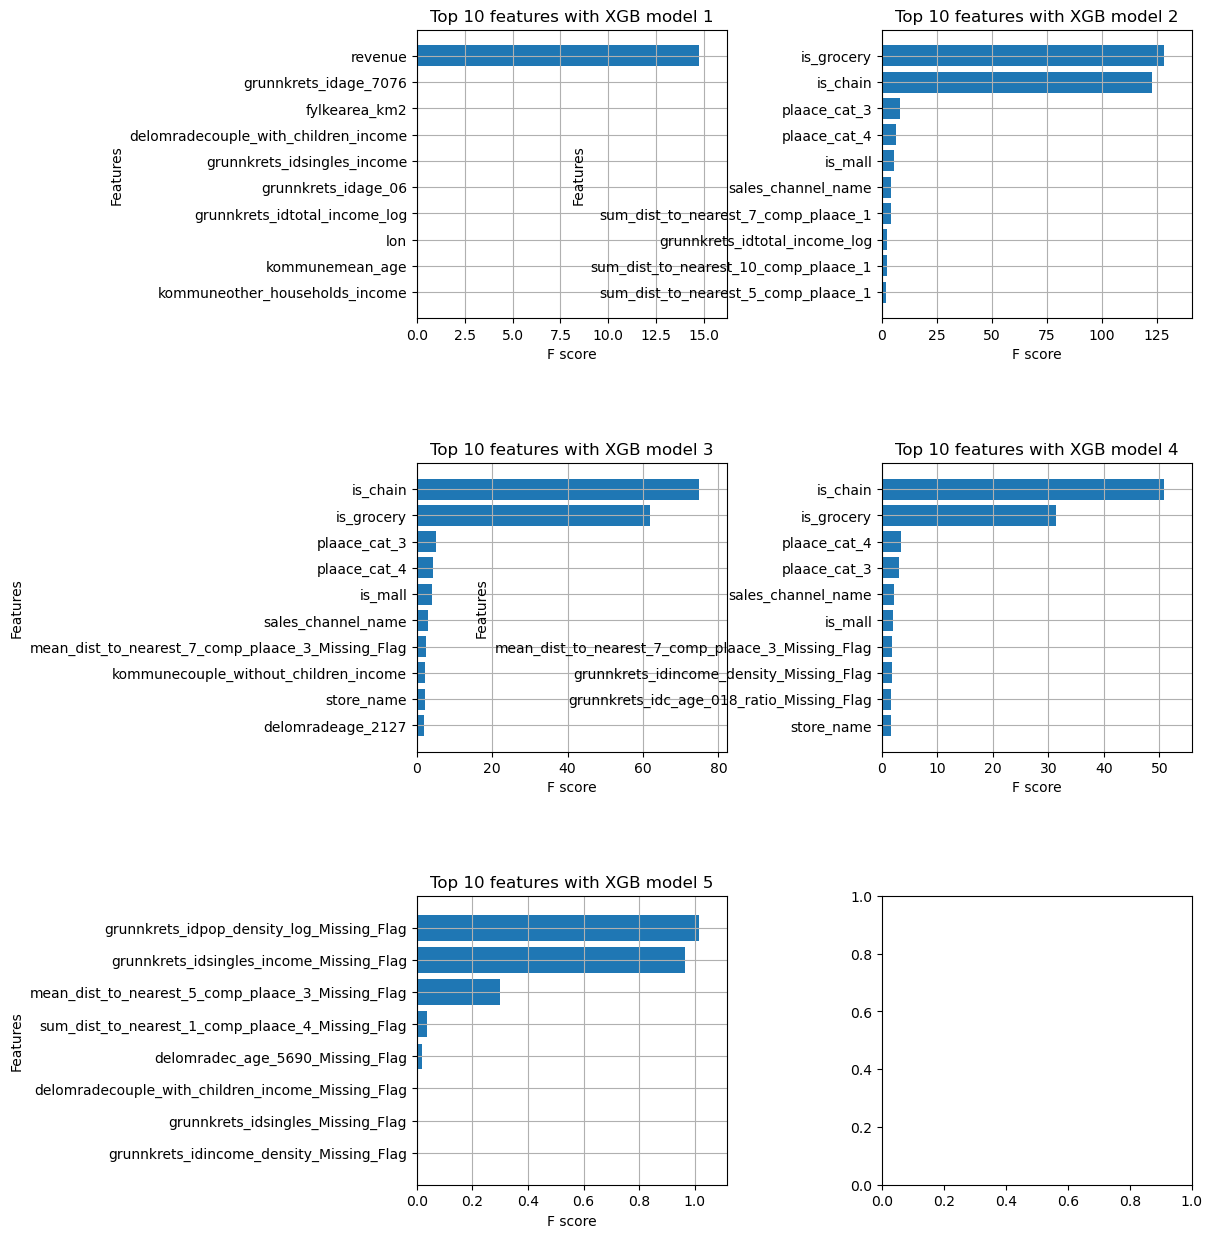

    Completed XGBoost feature selection in 1 seconds
    Alert: No ID variables ['store_id'] are included in selected features
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Alert: Dont forget to add a missing flag to mean_dist_to_nearest_7_comp_plaace_3 to create mean_dist_to_nearest_7_comp_plaace_3_Missing_Flag column
Alert: Dont forget to add a missing flag to grunnkrets_idincome_density to create grunnkrets_idincome_density_Missing_Flag column
Alert: Dont forget to add a missing flag to grunnkrets_idc_age_018_ratio to create grunnkrets_idc_age_018_ratio_Missing_Flag column
Alert: Dont forget to add a missing flag to grunnkrets_idsingles_income to create grunnkrets_idsingles_income_Missing_Flag column
Alert: Dont forget to add a missing flag to grunnkrets_idarea_km2 to 

In [5]:
features = fw.featurewiz(stores_train, target='log_revenue', corr_limit=0.70, verbose=2)

In [8]:
relevant_features = features[0]

In [11]:
with open("relevant_features.txt", "w") as f:
    f.write(";".join(relevant_features))